In [3]:
import numpy as np


def read_matrix_from_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        matrix = [[int(x) for x in line.split()] for line in lines[1:]]
    return np.array(matrix)


matrix1 = read_matrix_from_file("matrix1.txt")
matrix2 = read_matrix_from_file("matrix2.txt")
result_matrix_cpp = read_matrix_from_file("result_matrix.txt")

result_matrix_numpy = np.dot(matrix1, matrix2)

if np.array_equal(result_matrix_numpy, result_matrix_cpp):
    print("Результаты совпадают")
else:
    print("Результаты не совпадают")

Результаты совпадают


In [17]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import statistics as st
import pandas as pd


def read_results(filename):
    sizes = []
    computation_times = []
    with open(filename, 'r') as file:
        while True:
            tmp = []
            size_line = file.readline().strip()
            if not size_line:
                break
            size = int(size_line)
            task_size = int(file.readline().strip())
            for i in range(0, 10):
                comp_time = file.readline().strip()
                if not comp_time:
                    break
                tmp.append(int(comp_time))

            sizes.append(size)
            computation_times.append(tmp)
    return sizes, computation_times


def plot_intervals(sizes, intervals):
    means = [interval[0] for interval in intervals]
    lower_bounds = [interval[1][0] for interval in intervals]
    upper_bounds = [interval[1][1] for interval in intervals]

    plt.errorbar(sizes, means, yerr=[(upper-lower)/2 for upper, lower in zip(upper_bounds, lower_bounds)], fmt='o-', capsize=5)
    plt.xlabel('Размер матрицы')
    plt.ylabel('Время умножения')
    plt.grid(True)
    plt.show()


def get_intervals(computation_times):
    gamma = 0.95
    intervals = []
    for time in computation_times:
        n = len(time)
        x_mean = np.mean(time)
        s = np.sqrt(st.variance(time))
        confidence_interval = sts.t.interval(gamma, df=n-1, loc=x_mean, scale=s/np.sqrt(n))
        intervals.append([x_mean, confidence_interval])
    return intervals



sizes, computation_times = read_results("stats_2.txt")
arr = pd.DataFrame({"sizes":sizes, "times":computation_times})
intervals = get_intervals(computation_times)

In [18]:
arr

,sizes,times
0,100,"[48, 42, 44, 48, 38, 44, 41, 51, 33, 33]"
1,200,"[137, 135, 145, 142, 144, 141, 145, 143, 140, ..."
2,300,"[336, 334, 325, 331, 340, 324, 329, 328, 326, ..."
3,400,"[693, 640, 634, 639, 652, 645, 639, 632, 652, ..."
4,500,"[1062, 1141, 1078, 1047, 1026, 1074, 1071, 110..."
5,600,"[1692, 1622, 1668, 1642, 1725, 1693, 1714, 165..."
6,700,"[2497, 2442, 2460, 2474, 2405, 2539, 2387, 247..."
7,800,"[3420, 3304, 3307, 3569, 3559, 3417, 3367, 344..."
8,900,"[4571, 5172, 4823, 4558, 4496, 4826, 4832, 465..."
9,1000,"[7047, 6996, 7102, 7373, 7479, 7333, 7260, 751..."


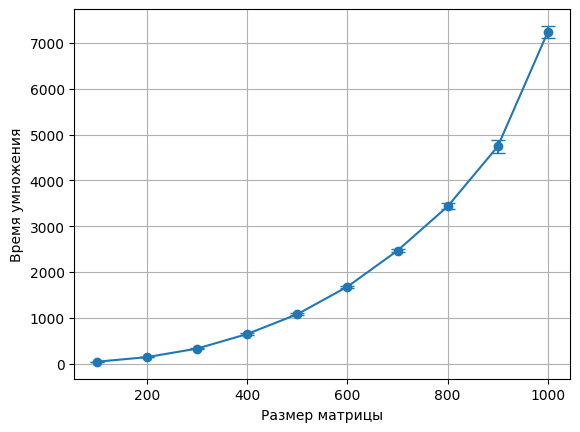

In [19]:

plot_intervals(sizes, intervals)